In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Reading the Dataset

In [2]:
train = pd.read_csv('Train.csv')

In [3]:
test_set = pd.read_csv('Test.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


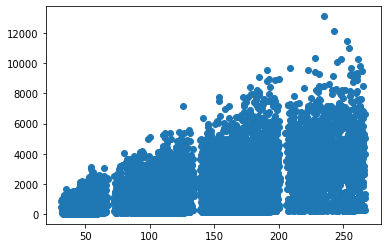

In [31]:
plt.scatter(train['Item_MRP'],train['Item_Outlet_Sales'])

#### From the scatter plot we can see that when the MRP increases the Sale amount also increase

In [5]:
train.groupby(['Item_Fat_Content']).median()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Fat_Content,,,,,
LF,12.15,0.050162,141.1654,1999,1797.6600
Low Fat,12.80,0.051565,142.2470,1999,1765.7016
Regular,12.50,0.058919,144.0102,1999,1845.5976
low fat,12.50,0.047763,121.5572,1998,1614.2321
reg,13.00,0.057944,146.6444,1999,1492.7236


#### Above we can see that, there are two types of Item_Fat_Content, Low Fat and Regular, and others such as LF, low fat and reg are just the variants of it. So it must be replaced and made be into just 2 categories

#### Replacing Variants of Low Fat and Regular to LF and Regular respectively

In [6]:
train.replace(to_replace='Low Fat',value='LF',inplace=True)
train.replace(to_replace='low fat',value='LF',inplace=True)
train.replace(to_replace='reg',value='Regular',inplace=True)

#### When the Outlet Type is Supermarket Type3, Item_Weight is found to be NaN

In [7]:
train[(train['Outlet_Type'])=='Supermarket Type3'].head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,LF,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,LF,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,LF,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
62,FDF09,NaN,LF,0.012090,Fruits and Vegetables,38.2848,OUT027,1985,Medium,Tier 3,Supermarket Type3,484.7024
64,FDY45,NaN,LF,0.026016,Snack Foods,255.8356,OUT027,1985,Medium,Tier 3,Supermarket Type3,2543.3560
84,FDR12,NaN,Regular,0.031382,Baking Goods,171.3764,OUT027,1985,Medium,Tier 3,Supermarket Type3,3091.9752
87,FDQ49,NaN,Regular,0.039058,Breakfast,155.9630,OUT027,1985,Medium,Tier 3,Supermarket Type3,3285.7230


#### Since many values of the Item_Weight are found to be NAN, replacing them with values of existing Item Weights

In [8]:
item_identifer_dict = dict()

In [9]:
for index, rows in train.iterrows():
    if not np.isnan(rows['Item_Weight']):
        if rows['Item_Identifier'] not in item_identifer_dict.keys():
            item_identifer_dict[rows['Item_Identifier']] = rows['Item_Weight']

In [10]:
for index, rows in train.iterrows():
    if np.isnan(rows['Item_Weight']):
        if rows['Item_Identifier'] in item_identifer_dict.keys():
            train['Item_Weight'][index] = item_identifer_dict[rows['Item_Identifier']]

C:\Users\ajay.jain2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [11]:
for index, rows in train.iterrows():
    if pd.isnull(rows['Item_Weight']):
        print(index, rows['Item_Identifier'],rows['Item_Fat_Content'],rows['Item_Type'])        

927 FDN52 Regular Frozen Foods
1922 FDK57 LF Snack Foods
4187 FDE52 Regular Dairy
5022 FDQ60 Regular Baking Goods


In [12]:
train.groupby(['Item_Type','Item_Fat_Content'])['Item_Weight'].agg('mean')

Item_Type              Item_Fat_Content
Baking Goods           LF                  12.538283
                       Regular             12.023601
Breads                 LF                  12.342679
                       Regular              9.979685
Breakfast              LF                  11.988902
                       Regular             13.249638
Canned                 LF                  11.948754
                       Regular             12.906591
Dairy                  LF                  13.438828
                       Regular             13.286255
Frozen Foods           LF                  12.454422
                       Regular             13.146827
Fruits and Vegetables  LF                  12.784556
                       Regular             13.709900
Hard Drinks            LF                  11.456238
Health and Hygiene     LF                  13.052327
Household              LF                  13.524780
Meat                   LF                  13.493235
      

In [17]:
train[(train['Item_Identifier']=='FDN52')] = train[(train['Item_Identifier']=='FDN52')].replace(np.NAN,13.146827)
train[(train['Item_Identifier']=='FDE52')] = train[(train['Item_Identifier']=='FDE52')].replace(np.NAN,13.286255)
train[(train['Item_Identifier']=='FDK57')] = train[(train['Item_Identifier']=='FDK57')].replace(np.NAN,13.792424)
train[(train['Item_Identifier']=='FDQ60')] = train[(train['Item_Identifier']=='FDQ60')].replace(np.NAN,12.023601)

#### On an average Outlet_Type 0 sells very less amount compared to Outlet_Type(s) 1, 2 and 3
#### Outlet_Type 3 sells the highest 

In [18]:
train.groupby('Outlet_Type').mean().sort_values('Item_Outlet_Sales')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Type,,,,,
Grocery Store,12.958974,0.104862,140.294688,1991.662050,339.828500
Supermarket Type2,12.873346,0.061014,141.678634,2009.000000,1995.498739
Supermarket Type1,12.849509,0.060723,141.213894,1999.322933,2316.181148
Supermarket Type3,12.936054,0.058615,139.801791,1985.000000,3694.038558


#### By looking at Sum, Min and Max of Outlet_Sales, we see a pattern where for Outlet_Type 2 and 3 the Sum, Min and Max are all same which infers that all the rows where Outlet_Type is 2 or 3 have unique Item_Identifiers i.e they have a sold a particular item only once in that year

In [19]:
train.groupby(['Item_Identifier','Outlet_Type'])['Item_Outlet_Sales'].agg(['sum','min','max'])

sum        min        max
Item_Identifier Outlet_Type                                        
DRA12           Grocery Store        283.6308   283.6308   283.6308
                Supermarket Type1   9927.0780   992.7078  3829.0158
                Supermarket Type2    850.8924   850.8924   850.8924
DRA24           Grocery Store        818.9340   327.5736   491.3604
                Supermarket Type1   9990.9948   982.7208  4422.2436
                Supermarket Type3   4913.6040  4913.6040  4913.6040
DRA59           Grocery Store        740.3696   185.0924   555.2772
                Supermarket Type1   8699.3428   555.2772  4442.2176
                Supermarket Type2   4442.2176  4442.2176  4442.2176
                Supermarket Type3   7033.5112  7033.5112  7033.5112
DRB01           Supermarket Type1   3984.8130  1518.0240  2466.7890
                Supermarket Type3    569.2590   569.2590   569.2590
DRB13           Grocery Store        948.7650   948.7650   948.7650
                Supermarket Type1  11195.4270   569.2590  3605.3070
DRB24           Supermarket Type1  12202.7824  1853.5872  4170.5712
DRB25           Grocery Store        214.3876   214.3876   214.3876
                Supermarket Type1   5252.4962   857.5504  2358.2636
                Supermarket Type2   1715.1008  1715.1008  1715.1008
                Supermarket Type3   2787.0388  2787.0388  2787.0388
DRB48           Grocery Store        157.1288   157.1288   157.1288
                Supermarket Type1   2906.8828   353.5398   746.3618
                Supermarket Type3   1296.3126  1296.3126  1296.3126
DRC01           Supermarket Type1   3695.1900   492.6920  1478.0760
                Supermarket Type2    443.4228   443.4228   443.4228
                Supermarket Type3   1034.6532  1034.6532  1034.6532
DRC12           Supermarket Type1   8949.6836   952.0940  3237.1196
DRC13           Supermarket Type1   5542.7850   739.0380  2956.1520
                Supermarket Type2    985.3840   985.3840   985.3840
DRC24           Supermarket Type1   3383.5956  3383.5956  3383.5956
                Supermarket Type2   2922.1962  2922.1962  2922.1962
...                                       ...        ...        ...
NCZ05           Grocery Store        103.1990   103.1990   103.1990
                Supermarket Type1   1960.7810   722.3930  1238.3880
NCZ06           Grocery Store        761.0094   761.0094   761.0094
                Supermarket Type1  13444.4994  2536.6980  4566.0564
                Supermarket Type2   5327.0658  5327.0658  5327.0658
                Supermarket Type3   3297.7074  3297.7074  3297.7074
NCZ17           Grocery Store         37.9506    37.9506    37.9506
                Supermarket Type1   2922.1962   645.1602  1480.0734
                Supermarket Type2    493.3578   493.3578   493.3578
                Supermarket Type3   1480.0734  1480.0734  1480.0734
NCZ18           Grocery Store        761.0094   761.0094   761.0094
                Supermarket Type1  25113.3102  1522.0188  6849.0846
                Supermarket Type2   3805.0470  3805.0470  3805.0470
NCZ29           Grocery Store        503.3448   503.3448   503.3448
                Supermarket Type1   6165.9738  1384.1982  3020.0688
NCZ30           Grocery Store        241.0196   241.0196   241.0196
                Supermarket Type1   9038.2350   602.5490  2530.7058
                Supermarket Type3   3374.2744  3374.2744  3374.2744
NCZ41           Supermarket Type1   7259.8832   876.1928  2503.4080
                Supermarket Type2   1877.5560  1877.5560  1877.5560
NCZ42           Grocery Store        711.0744   711.0744   711.0744
                Supermarket Type1  18487.9344  4029.4216  5451.5704
NCZ53           Grocery Store        376.8428   376.8428   376.8428
                Supermarket Type1   7160.0132  3203.1638  3956.8494
                Supermarket Type2   1884.2140  1884.2140  1884.2140
                Supermarket Type3   5652.6420  5652.6420  5652.6420
NCZ54           Grocery Store 

#### In Each Item_Type,the MRP of least costing item ranges between 30 and 40 whereas the MRP of highest costing item in that particular type ranges between 240 and 260

In [20]:
train.groupby('Item_Type')['Item_MRP'].agg(['min','max','mean'])

,min,max,mean
Item_Type,,,
Baking Goods,33.9874,265.5568,126.380766
Breads,31.9558,263.6594,140.952669
Breakfast,40.0480,234.9300,141.788151
Canned,36.3506,266.8884,139.763832
Dairy,33.4874,266.6884,148.499208
Frozen Foods,31.9558,264.8910,138.503366
Fruits and Vegetables,36.2506,264.2252,144.581235
Hard Drinks,34.2532,261.4278,137.077928
Health and Hygiene,33.1216,266.6884,130.818921


In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Converting Item Identifier and Outlet Identifier to Categorical Variables

In [23]:
train['Item_Identifier'] = train['Item_Identifier'].astype('category')
train['Outlet_Identifier'] = train['Outlet_Identifier'].astype('category')

In [24]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### We can see that when the Outlet_Type and Outlet_Location_Type is either (Grocery Store Tier, 3) OR (Supermarket Type1, Tier 2) the Outlet_Size if found to be NAN

In [13]:
for index, rows in train.iterrows():
    if pd.isnull(rows['Outlet_Size']):
        print(index, rows['Outlet_Identifier'],rows['Outlet_Location_Type'],rows['Outlet_Type'])

3 OUT010 Tier 3 Grocery Store
8 OUT045 Tier 2 Supermarket Type1
9 OUT017 Tier 2 Supermarket Type1
25 OUT017 Tier 2 Supermarket Type1
28 OUT010 Tier 3 Grocery Store
30 OUT010 Tier 3 Grocery Store
33 OUT045 Tier 2 Supermarket Type1
45 OUT010 Tier 3 Grocery Store
46 OUT045 Tier 2 Supermarket Type1
47 OUT045 Tier 2 Supermarket Type1
53 OUT017 Tier 2 Supermarket Type1
54 OUT017 Tier 2 Supermarket Type1
56 OUT045 Tier 2 Supermarket Type1
61 OUT045 Tier 2 Supermarket Type1
65 OUT010 Tier 3 Grocery Store
67 OUT045 Tier 2 Supermarket Type1
68 OUT045 Tier 2 Supermarket Type1
72 OUT045 Tier 2 Supermarket Type1
73 OUT017 Tier 2 Supermarket Type1
78 OUT017 Tier 2 Supermarket Type1
79 OUT045 Tier 2 Supermarket Type1
85 OUT017 Tier 2 Supermarket Type1
90 OUT010 Tier 3 Grocery Store
92 OUT045 Tier 2 Supermarket Type1
100 OUT045 Tier 2 Supermarket Type1
107 OUT045 Tier 2 Supermarket Type1
111 OUT017 Tier 2 Supermarket Type1
114 OUT045 Tier 2 Supermarket Type1
116 OUT017 Tier 2 Supermarket Type1
118 OUT

1231 OUT045 Tier 2 Supermarket Type1
1232 OUT045 Tier 2 Supermarket Type1
1233 OUT010 Tier 3 Grocery Store
1234 OUT045 Tier 2 Supermarket Type1
1238 OUT045 Tier 2 Supermarket Type1
1239 OUT045 Tier 2 Supermarket Type1
1241 OUT017 Tier 2 Supermarket Type1
1246 OUT017 Tier 2 Supermarket Type1
1247 OUT045 Tier 2 Supermarket Type1
1249 OUT045 Tier 2 Supermarket Type1
1250 OUT017 Tier 2 Supermarket Type1
1257 OUT045 Tier 2 Supermarket Type1
1259 OUT010 Tier 3 Grocery Store
1262 OUT017 Tier 2 Supermarket Type1
1266 OUT045 Tier 2 Supermarket Type1
1269 OUT045 Tier 2 Supermarket Type1
1272 OUT010 Tier 3 Grocery Store
1275 OUT017 Tier 2 Supermarket Type1
1278 OUT017 Tier 2 Supermarket Type1
1282 OUT017 Tier 2 Supermarket Type1
1283 OUT017 Tier 2 Supermarket Type1
1286 OUT017 Tier 2 Supermarket Type1
1288 OUT045 Tier 2 Supermarket Type1
1291 OUT010 Tier 3 Grocery Store
1292 OUT045 Tier 2 Supermarket Type1
1297 OUT017 Tier 2 Supermarket Type1
1298 OUT017 Tier 2 Supermarket Type1
1301 OUT045 Tier 

3399 OUT010 Tier 3 Grocery Store
3405 OUT017 Tier 2 Supermarket Type1
3406 OUT017 Tier 2 Supermarket Type1
3408 OUT010 Tier 3 Grocery Store
3417 OUT010 Tier 3 Grocery Store
3419 OUT010 Tier 3 Grocery Store
3426 OUT017 Tier 2 Supermarket Type1
3427 OUT017 Tier 2 Supermarket Type1
3430 OUT017 Tier 2 Supermarket Type1
3431 OUT045 Tier 2 Supermarket Type1
3432 OUT010 Tier 3 Grocery Store
3433 OUT045 Tier 2 Supermarket Type1
3434 OUT017 Tier 2 Supermarket Type1
3435 OUT045 Tier 2 Supermarket Type1
3441 OUT045 Tier 2 Supermarket Type1
3442 OUT045 Tier 2 Supermarket Type1
3445 OUT017 Tier 2 Supermarket Type1
3446 OUT045 Tier 2 Supermarket Type1
3448 OUT017 Tier 2 Supermarket Type1
3449 OUT017 Tier 2 Supermarket Type1
3451 OUT045 Tier 2 Supermarket Type1
3456 OUT045 Tier 2 Supermarket Type1
3457 OUT045 Tier 2 Supermarket Type1
3459 OUT045 Tier 2 Supermarket Type1
3460 OUT017 Tier 2 Supermarket Type1
3461 OUT045 Tier 2 Supermarket Type1
3467 OUT017 Tier 2 Supermarket Type1
3468 OUT045 Tier 2 Su

4673 OUT017 Tier 2 Supermarket Type1
4675 OUT017 Tier 2 Supermarket Type1
4677 OUT045 Tier 2 Supermarket Type1
4682 OUT045 Tier 2 Supermarket Type1
4684 OUT045 Tier 2 Supermarket Type1
4686 OUT045 Tier 2 Supermarket Type1
4692 OUT045 Tier 2 Supermarket Type1
4693 OUT010 Tier 3 Grocery Store
4696 OUT017 Tier 2 Supermarket Type1
4699 OUT017 Tier 2 Supermarket Type1
4700 OUT017 Tier 2 Supermarket Type1
4709 OUT045 Tier 2 Supermarket Type1
4710 OUT045 Tier 2 Supermarket Type1
4711 OUT045 Tier 2 Supermarket Type1
4716 OUT045 Tier 2 Supermarket Type1
4722 OUT045 Tier 2 Supermarket Type1
4737 OUT045 Tier 2 Supermarket Type1
4741 OUT017 Tier 2 Supermarket Type1
4752 OUT017 Tier 2 Supermarket Type1
4754 OUT045 Tier 2 Supermarket Type1
4756 OUT017 Tier 2 Supermarket Type1
4760 OUT017 Tier 2 Supermarket Type1
4763 OUT045 Tier 2 Supermarket Type1
4764 OUT017 Tier 2 Supermarket Type1
4768 OUT045 Tier 2 Supermarket Type1
4770 OUT010 Tier 3 Grocery Store
4773 OUT017 Tier 2 Supermarket Type1
4774 OUT0

6044 OUT010 Tier 3 Grocery Store
6054 OUT045 Tier 2 Supermarket Type1
6061 OUT017 Tier 2 Supermarket Type1
6062 OUT010 Tier 3 Grocery Store
6072 OUT010 Tier 3 Grocery Store
6078 OUT045 Tier 2 Supermarket Type1
6080 OUT010 Tier 3 Grocery Store
6083 OUT045 Tier 2 Supermarket Type1
6086 OUT017 Tier 2 Supermarket Type1
6087 OUT045 Tier 2 Supermarket Type1
6088 OUT017 Tier 2 Supermarket Type1
6094 OUT010 Tier 3 Grocery Store
6095 OUT010 Tier 3 Grocery Store
6096 OUT017 Tier 2 Supermarket Type1
6101 OUT045 Tier 2 Supermarket Type1
6108 OUT045 Tier 2 Supermarket Type1
6110 OUT017 Tier 2 Supermarket Type1
6111 OUT017 Tier 2 Supermarket Type1
6112 OUT017 Tier 2 Supermarket Type1
6123 OUT017 Tier 2 Supermarket Type1
6124 OUT017 Tier 2 Supermarket Type1
6127 OUT017 Tier 2 Supermarket Type1
6130 OUT045 Tier 2 Supermarket Type1
6131 OUT017 Tier 2 Supermarket Type1
6133 OUT045 Tier 2 Supermarket Type1
6136 OUT010 Tier 3 Grocery Store
6142 OUT017 Tier 2 Supermarket Type1
6145 OUT010 Tier 3 Grocery St

7633 OUT017 Tier 2 Supermarket Type1
7634 OUT017 Tier 2 Supermarket Type1
7636 OUT045 Tier 2 Supermarket Type1
7639 OUT010 Tier 3 Grocery Store
7648 OUT045 Tier 2 Supermarket Type1
7650 OUT045 Tier 2 Supermarket Type1
7652 OUT045 Tier 2 Supermarket Type1
7665 OUT017 Tier 2 Supermarket Type1
7667 OUT045 Tier 2 Supermarket Type1
7672 OUT045 Tier 2 Supermarket Type1
7682 OUT010 Tier 3 Grocery Store
7689 OUT010 Tier 3 Grocery Store
7692 OUT017 Tier 2 Supermarket Type1
7701 OUT045 Tier 2 Supermarket Type1
7706 OUT017 Tier 2 Supermarket Type1
7714 OUT017 Tier 2 Supermarket Type1
7719 OUT017 Tier 2 Supermarket Type1
7723 OUT045 Tier 2 Supermarket Type1
7724 OUT045 Tier 2 Supermarket Type1
7727 OUT045 Tier 2 Supermarket Type1
7728 OUT045 Tier 2 Supermarket Type1
7730 OUT010 Tier 3 Grocery Store
7732 OUT017 Tier 2 Supermarket Type1
7745 OUT045 Tier 2 Supermarket Type1
7757 OUT045 Tier 2 Supermarket Type1
7759 OUT010 Tier 3 Grocery Store
7762 OUT045 Tier 2 Supermarket Type1
7764 OUT045 Tier 2 Su

In [14]:
train[(train.Outlet_Location_Type=='Tier 2')].head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
19,FDU02,13.350,LF,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
22,NCB30,14.600,LF,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
25,NCD06,13.000,LF,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
26,FDV10,7.645,Regular,0.066693,Snack Foods,42.3112,OUT035,2004,Small,Tier 2,Supermarket Type1,1065.2800
33,FDO23,17.850,LF,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,LF,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,LF,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972
53,FDA43,10.895,LF,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,NaN,Tier 2,Supermarket Type1,3121.2704


#### We can see that when Outlet_Location_Type is Tier 2, the Outlet_Size is found to be Small and as Grocery Stores are usually small, Replacing the missing Outlet_Size values with Small

In [15]:
for index,rows in train.iterrows():
    if rows['Outlet_Type']=='Supermarket Type1' and rows['Outlet_Location_Type']=='Tier 2':
        if pd.isnull(rows['Outlet_Size']):
            train['Outlet_Size'][index] = 'Small'

C:\Users\ajay.jain2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
for index,rows in train.iterrows():
    if rows['Outlet_Type']=='Grocery Store':
        if pd.isnull(rows['Outlet_Size']):
            train['Outlet_Size'][index] = 'Small'

C:\Users\ajay.jain2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [25]:
train[(train.Outlet_Type=='Grocery Store')].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
23,FDC37,15.500,LF,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Small,Tier 3,Grocery Store,178.4344
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250,LF,0.170349,Dairy,55.7956,OUT010,1998,Small,Tier 3,Grocery Store,163.7868


#### Creating dummy variables for the different categorical variables and concantenating them to original dataframe

In [26]:
dummy_item_type = pd.get_dummies(train['Item_Type'])
dummy_outlet_type = pd.get_dummies(train['Outlet_Type'])
dummy_outlet_size = pd.get_dummies(train['Outlet_Size'])
dummy_outlet_location_type = pd.get_dummies(train['Outlet_Location_Type'])
dummy_item_fat_content = pd.get_dummies(train['Item_Fat_Content'])

In [27]:
train = pd.concat([train,dummy_item_fat_content,dummy_item_type,dummy_outlet_size,dummy_outlet_location_type,dummy_outlet_type],axis=1)

In [28]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,...,0,0,1,0,0,1,1,0,0,0
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,1,0,0,0,0,1,0,1,0,0


In [39]:
train.groupby(['Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Identifier'])['Item_Outlet_Sales'].agg('sum')

Outlet_Type        Outlet_Location_Type  Outlet_Size  Outlet_Identifier
Grocery Store      Tier 1                Small        OUT019               1.796941e+05
                   Tier 3                Small        OUT010               1.883402e+05
Supermarket Type1  Tier 1                Medium       OUT049               2.183970e+06
                                         Small        OUT046               2.118395e+06
                   Tier 2                Small        OUT017               2.167465e+06
                                                      OUT035               2.268123e+06
                                                      OUT045               2.036725e+06
                   Tier 3                High         OUT013               2.142664e+06
Supermarket Type2  Tier 3                Medium       OUT018               1.851823e+06
Supermarket Type3  Tier 3                Medium       OUT027               3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

#### Supermarket Type1 sells the most, this is because it has totally 6 stores, even though Grocery Store has 2 stores, it sells the least

#### Also if we consider sales on a single store basis Supermarket Type3 has the maximum sales and the individual stores in Supermarket Type which belongs to different Tiers and have different Sizes have around the same amount of sales

In [36]:
train.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].agg('sum')

Item_Fat_Content
LF         1.190409e+07
Regular    6.687031e+06
Name: Item_Outlet_Sales, dtype: float64

#### Low Fat Items sells more than Regular Items

In [40]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.api import OLS

In [41]:
model = linear_model.LinearRegression()

In [46]:
len(x_train)

5966

In [47]:
len(x_test)

2557

In [59]:
x_train, x_test = train_test_split(train,test_size=0.2)
X = x_train.iloc[:,[1,3,5,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]].values
y = x_train.iloc[:,11].values

X_test = x_test.iloc[:,[1,3,5,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]].values
y_test = x_test.iloc[:,11].values
model.fit(X,y)
pred = model.predict(X_test)
print("RMS Value",mean_squared_error(y_test,pred)**0.5)

RMS Value 1104.6141312923326


In [60]:
res = OLS(y,X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     333.3
Date:                Sat, 28 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:41:53   Log-Likelihood:                -57632.
No. Observations:                6818   AIC:                         1.153e+05
Df Residuals:                    6791   BIC:                         1.155e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5929      2.989      0.533      0.594      -4.266       7.451
x2          -396.2516    283.178     -1.399      0.162    -951.370     158.867
x3            15.6165      0.222     70.314      0.000      15.181      16.052
x4           -55.4211     29.957     -1.850      0.064    -114.147       3.305
x5            -9.5431     32.032     -0.298      0.766     -72.336      53.250
x6            18.4194     50.760      0.363      0.717     -81.086     117.925
x7             7.2234     76.537      0.094      0.925    -142.813     157.260
x8            16.8062    109.342      0.154      0.878    -197.538     231.151
x9            40.7420     50.966      0.799      0.424     -59.168     140.652
x10          -31.1355     49.471     -0.629      0.529    -128.115      65.844
x11          -21.7718     45.492     -0.479      0.632    -110.951      67.408
x12           25.0573     39.332      0.637      0.524     -52.045     102.160
x13          -47.3380     85.302     -0.555      0.579    -214.556     119.880
x14           14.6843     56.293      0.261      0.794     -95.667     125.036
x15          -25.2622     45.268     -0.558      0.577    -114.002      63.478
x16           22.7327     60.786      0.374      0.708     -96.427     141.892
x17          -37.4752     92.253     -0.406      0.685    -218.320     143.369
x18           23.8553    150.598      0.158      0.874    -271.365     319.075
x19            1.1174     39.950      0.028      0.978     -77.196      79.431
x20          -35.3003     59.220     -0.596      0.551    -151.389      80.789
x21          -37.3193     97.929     -0.381      0.703    -229.291     154.652
x22          -26.2939     74.563     -0.353      0.724    -172.460     119.872
x23           20.5576     38.097      0.540      0.589     -54.125      95.240
x24          -59.2279     37.210     -1.592      0.111    -132.171      13.715
x25          -39.4424     41.465     -0.951      0.342    -120.727      41.842
x26           26.0066     52.640      0.494      0.621     -77.185     129.198
x27          -51.5285     44.715     -1.152      0.249    -139.185      36.128
x28        -1694.8246     53.080    -31.930      0.000   -1798.877   -1590.772
x29          213.0778     48.959      4.352      0.000     117.102     309.054
x30         -148.3709     57.029     -2.602      0.009    -260.166     -36.576
x31         1565.1535     56.820     27.546      0.000    1453.768    1676.539
==============================================================================
Omnibus:                      819.827   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2026.610
Skew:                           0.694   Prob(JB):                         0.00
Kurtosis:                       5.282   Cond. No.                     1.16e+16
==

#### From the above summary we can see that only x3, x28, x29, x30, x31 are the significant features whereas other features are not significant. These features correspond to Item_MRP, Grocery Store, Supermarket Type1, Supermarket Type2, Supermarket Type3

#### Therefore Removing the other features from the model

In [61]:
X = x_train.iloc[:,[5,36,37,38,39]].values
y = x_train.iloc[:,11].values

X_test = x_test.iloc[:,[5,36,37,38,39]].values
y_test = x_test.iloc[:,11].values
model.fit(X,y)
pred = model.predict(X_test)
print("RMS Value",mean_squared_error(y_test,pred)**0.5)

RMS Value 1104.0792011366111


In [62]:
res = OLS(y,X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     2166.
Date:                Sat, 28 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:45:34   Log-Likelihood:                -57638.
No. Observations:                6818   AIC:                         1.153e+05
Df Residuals:                    6813   BIC:                         1.153e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            15.6032      0.221     70.728      0.000      15.171      16.036
x2         -1859.2522     49.594    -37.490      0.000   -1956.471   -1762.033
x3           121.4807     35.632      3.409      0.001      51.631     191.330
x4          -219.4156     52.160     -4.207      0.000    -321.666    -117.165
x5          1494.7223     51.609     28.962      0.000    1393.553    1595.892
==============================================================================
Omnibus:                      816.616   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2015.152
Skew:                           0.692   Prob(JB):                         0.00
Kurtosis:                       5.275   Cond. No.                         815.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
list_rms = list()
for i in range(1000):
    x_train, x_test = train_test_split(train,test_size=0.2)
    X = x_train.iloc[:,[5,36,37,39]].values
    y = x_train.iloc[:,11].values

    X_test = x_test.iloc[:,[5,36,37,39]].values
    y_test = x_test.iloc[:,11].values
    model.fit(X,y)
    pred = model.predict(X_test)
    #mean_squared_error(y_test,pred)
    list_rms.append(mean_squared_error(y_test,pred)**0.5)
print(max(list_rms))
print(min(list_rms))
print(mean(list_rms))

1198.81868690875
1037.3259320118955
1129.733304640107


#### Running the model 1000 times we get average RMS value of 1129